In [1]:
import argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib_venn import venn3, venn3_circles

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd /Users/james/hcc_example

/Users/james/hcc_example


In [3]:
table = pd.read_table('04.counts/hcc_example.miRNA.homer.ct.mx')

In [4]:
samplenames = table.columns[1:]

In [5]:
table.head(10)

,geneID,NC_1,NC_2,NC_3,BeforeSurgery_1,BeforeSurgery_2,BeforeSurgery_3,AfterSurgery_1,AfterSurgery_2,AfterSurgery_3
0,MI0016771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MI0006377,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MI0017409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MI0003670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MI0006339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,MI0022587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,MI0006403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,MI0016824,0.0,0.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0
8,MI0017415,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
9,MI0020353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
my_pal = {}
for i in range(9):
    my_pal[samplenames[i]] = tableau20[i]

In [7]:
my_pal

{'AfterSurgery_1': (214, 39, 40),
 'AfterSurgery_2': (255, 152, 150),
 'AfterSurgery_3': (148, 103, 189),
 'BeforeSurgery_1': (255, 187, 120),
 'BeforeSurgery_2': (44, 160, 44),
 'BeforeSurgery_3': (152, 223, 138),
 'NC_1': (31, 119, 180),
 'NC_2': (174, 199, 232),
 'NC_3': (255, 127, 14)}

In [8]:
sns.color_palette("hls", 9)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6554666666666664)]

### samples boxplot

#### contain outlier

[Text(0,0,u'NC_1'),
 Text(0,0,u'NC_2'),
 Text(0,0,u'NC_3'),
 Text(0,0,u'BeforeSurgery_1'),
 Text(0,0,u'BeforeSurgery_2'),
 Text(0,0,u'BeforeSurgery_3'),
 Text(0,0,u'AfterSurgery_1'),
 Text(0,0,u'AfterSurgery_2'),
 Text(0,0,u'AfterSurgery_3')]

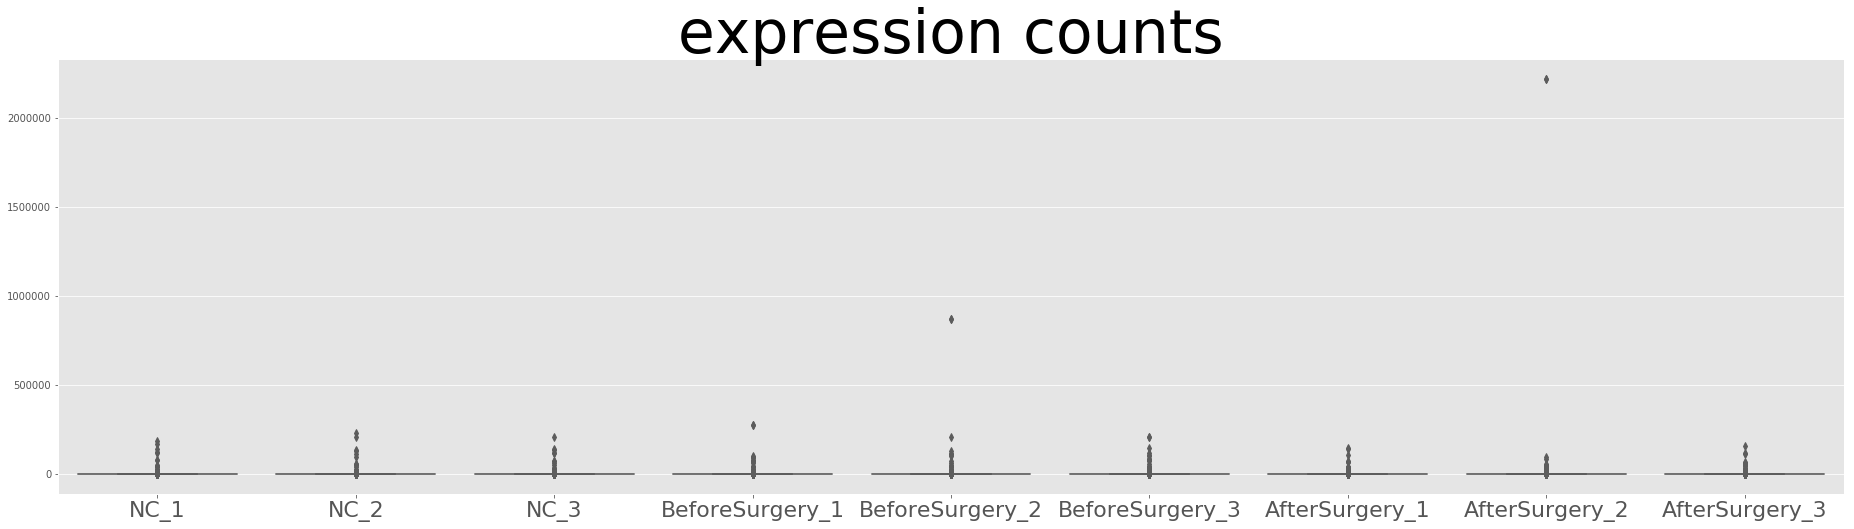

In [9]:
fig, ax = plt.subplots(figsize=(32,8))
sns.boxplot(data =table.iloc[:,1:],ax=ax,boxprops=dict(alpha=.5),
            palette=sns.color_palette("hls", 9))
ax.set_title(u'expression counts',fontsize=60)
ax.set_xticks(range(9))
ax.set_xticklabels(samplenames,fontsize=22)
#ax.set_yticks(np.arange(0,1,0.1))
#ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

#### remove outlier

[Text(0,0,u'0'),
 Text(0,0,u'1'),
 Text(0,0,u'2'),
 Text(0,0,u'3'),
 Text(0,0,u'4'),
 Text(0,0,u'5')]

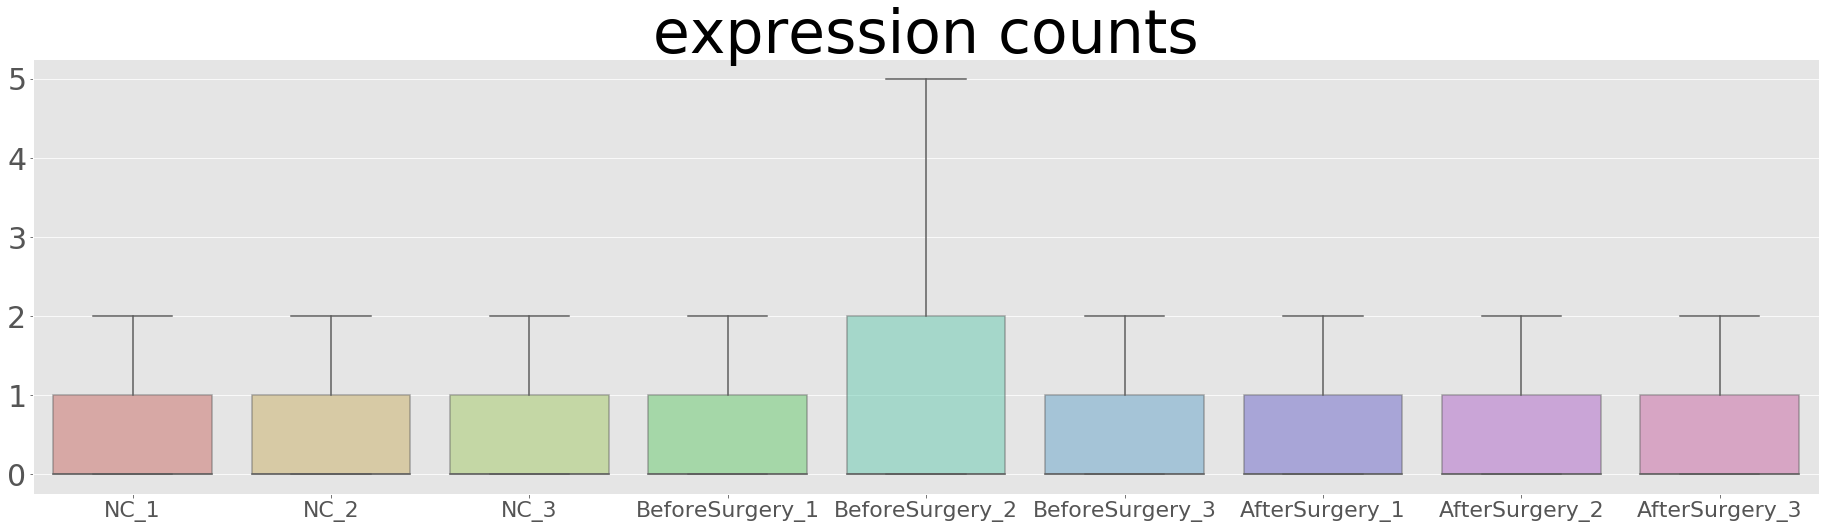

In [10]:
fig, ax = plt.subplots(figsize=(32,8))
sns.boxplot(data =table.iloc[:,1:],ax=ax,boxprops=dict(alpha=.5),
            palette=sns.color_palette("hls", 9),showfliers=False)
ax.set_title(u'expression counts',fontsize=60)
ax.set_xticks(range(9))
ax.set_xticklabels(samplenames,fontsize=22)
ax.set_yticks(np.arange(0,6,1))
ax.set_yticklabels(np.arange(0,6),fontsize=30)

### hist

#### contain outlier

#### without outlier

In [11]:
def reject_outliers(data, m=0.5):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
data = np.array(table.iloc[:,1:])

(array([1.831e+03, 6.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 5.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,   3683.54,   7367.08,  11050.62,  14734.16,  18417.7 ,
         22101.24,  25784.78,  29468.32,  33151.86,  36835.4 ,  40518.94,
         44202.48,  47886.02,  51569.56,  55253.1 ,  58936.64,  62620.18,
         66303.72,  69987.26,  73670.8 ,  77354.34,  81037.88,  84721.42,
         88404.96,  92088.5 ,  95772.04,  99455.58, 103139.12, 106822.66,
      

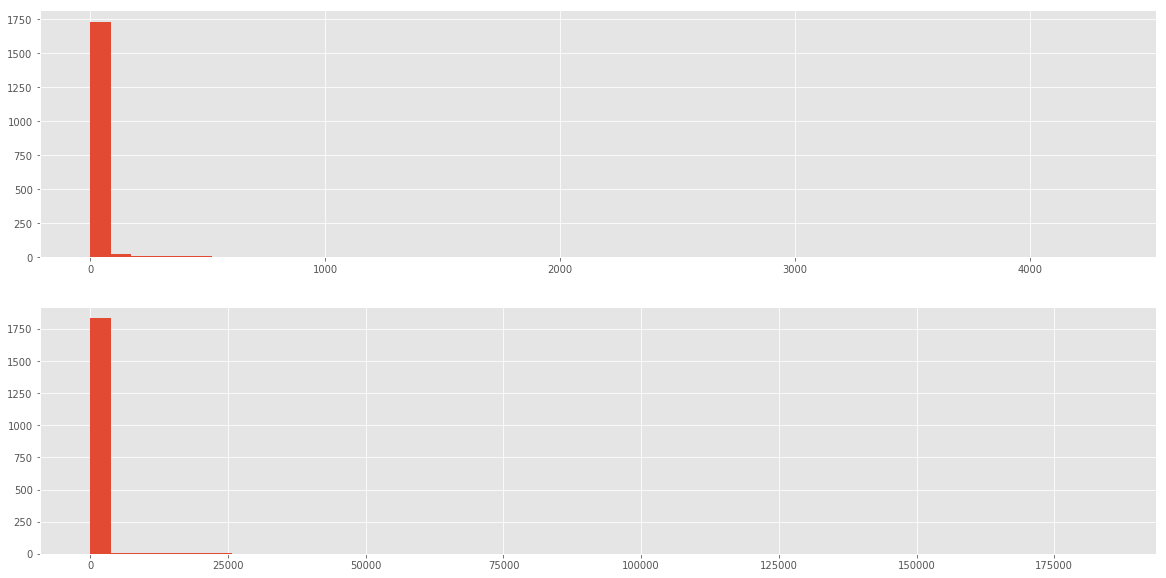

In [12]:
fig, ax = plt.subplots(2,figsize=(20,10))
ax[0].hist(reject_outliers(data[:,0]),bins=50)
ax[1].hist(data[:,0],bins=50)

(array([1.831e+03, 6.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 5.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,   3683.54,   7367.08,  11050.62,  14734.16,  18417.7 ,
         22101.24,  25784.78,  29468.32,  33151.86,  36835.4 ,  40518.94,
         44202.48,  47886.02,  51569.56,  55253.1 ,  58936.64,  62620.18,
         66303.72,  69987.26,  73670.8 ,  77354.34,  81037.88,  84721.42,
         88404.96,  92088.5 ,  95772.04,  99455.58, 103139.12, 106822.66,
      

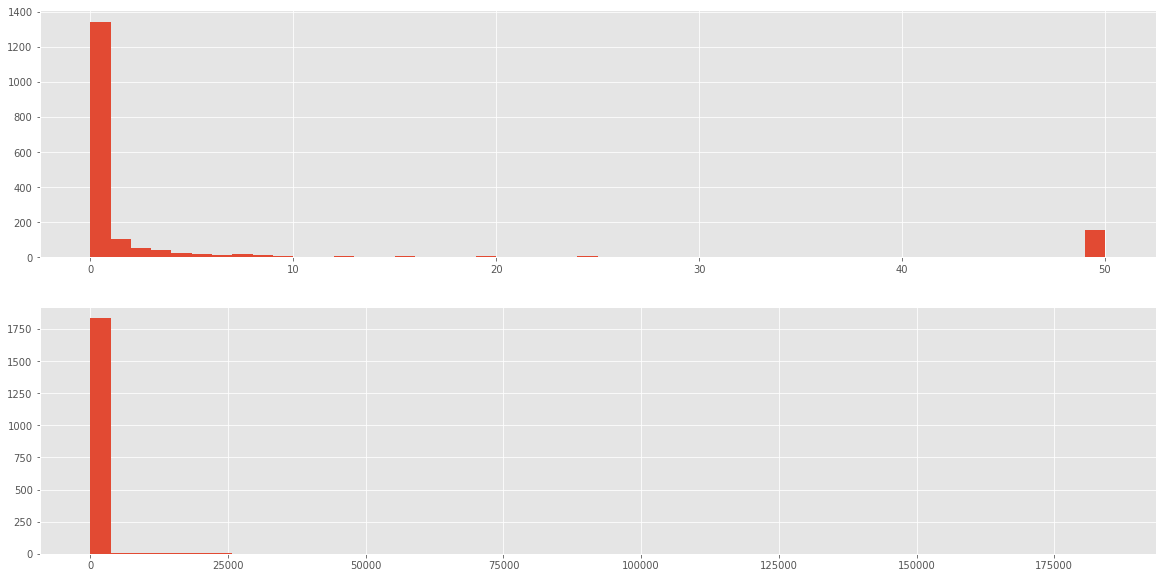

In [13]:
fig, ax = plt.subplots(2,figsize=(20,10))
ax[0].hist(np.clip(data[:,0],0,50),bins=50)
ax[1].hist(data[:,0],bins=50)

### rules to pick genes

In [14]:
def pick_genes(data,thres,num):
    return np.sum(np.sum(data >=thres,axis=1) >num)

In [15]:
thres = 50
num = 8
remain = np.zeros([thres,num])
for i in np.arange(1,thres+1):
    for j in np.arange(1,num+1):
        remain[i-1,j-1] = pick_genes(data,i,j)

In [17]:
sizeref = 2.*max(remain.ravel())/(100**2)

In [18]:
text = [[('threshold: {country}<br>'+'number of sample: {lifeExp}<br>'+
 'remain genes: {gdp}<br>').format(country=np.repeat(np.arange(1,thres+1),num).reshape(-1,num).T[0][j],
lifeExp=np.repeat(np.arange(1,num+1),thres).reshape(num,-1)[i][j],gdp=remain[:,i][j]) for j in range(thres)] for i in range(num)]

#### scatter plot

In [19]:
data_ = [go.Scatter(
    x=np.repeat(np.arange(1,thres+1),num).reshape(-1,num).T[0],
    y=np.repeat(np.arange(1,num+1),thres).reshape(num,-1)[i],
    mode='markers',
    name=['number >'+str(np.arange(1,num+1)[j]) for j in range(num)][i],
    text=text[i],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=remain[:,i]*sizeref,
        line=dict(
            width=2
        ),
    )
) for i in range(num)]

layout = go.Layout(
    title='Remain total genes',
    xaxis=dict(
        title='threshold',
        gridcolor='rgb(255, 255, 255)',
        range=[-1,thres+1],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='number',
        gridcolor='rgb(255, 255, 255)',
        range=[-1,10],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data_, layout=layout)
py.iplot(fig)

#### line

In [32]:
data = [go.Scatter(
    x = np.arange(1,thres+1),
    y = remain[:,i],
    name = np.arange(1,num+1)[i],
    line = dict(
        color = (['rgb'+str(tableau20[j]) for j in range(20)][i]),
        width = 4,dash=['dash', 'dot', 'dashdot'][i%3])
) for i in range(num)]
layout = dict(title = 'Remain total genes',
              xaxis = dict(title = 'threshold'),
              yaxis = dict(title = 'number'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [ ]:
the codes use DESeq2 and produces files:
05.diffexp/hcc_example.miRNA.homer.DESeq2.rlog.mx
05.diffexp/hcc_example.miRNA.NCvsHCC.DESeq2.tsv

the codes use edgeR and produces files:
05.diffexp/hcc_example.miRNA.NCvsHCC.edgeR.classic.tsv
05.diffexp/hcc_example.miRNA.homer.edgeR.TMM.mx
05.diffexp/hcc_example.miRNA.NCvsHCC.edgeR.tsv

the codes use wilconx test and produces files:
05.diffexp/hcc_example.miRNA.NCvsHCC.wilcox_.tsv

## check results

#### compare before and after normalization

In [54]:
def matshowdata(filepath):
    fig, ax = plt.subplots(1,figsize=(20,10))
    data = np.array(pd.read_table(filepath).iloc[:,1:])
    ax.matshow(np.repeat(data,20,axis=1))

In [70]:
def matshowdata_compare(filepath1,filepath2):
    fig, ax = plt.subplots(1,2,figsize=(10,10))
    data = np.array(pd.read_table(filepath1).iloc[:,1:])
    data1 = np.array(pd.read_table(filepath2).iloc[:,1:])
    ax[1].matshow(np.repeat(data,20,axis=1),cmap='jet')
    ax[0].matshow(np.repeat(data1,60,axis=1),cmap='jet')
    ax[0].set_title('before normalization')
    ax[1].set_title('after normalization')

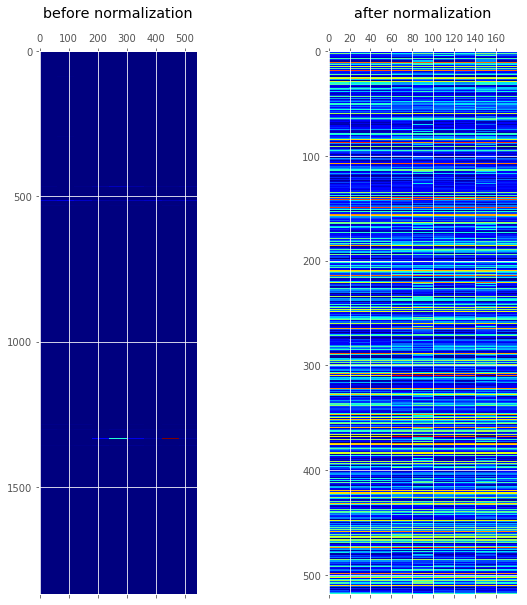

In [71]:
matshowdata_compare('05.diffexp/hcc_example.miRNA.homer.DESeq2.rlog.mx',"04.counts/hcc_example.miRNA.homer.ct.mx")

In [88]:
def readtable(filepath):
    table = pd.read_table(filepath)
    print table.shape
    return table.head(5)

### readtablle

#### DESeq2

In [89]:
readtable('05.diffexp/hcc_example.miRNA.NCvsHCC.DESeq2.tsv')

(519, 16)


,Gene,NC_1,NC_2,NC_3,BeforeSurgery_1,BeforeSurgery_2,BeforeSurgery_3,AfterSurgery_1,AfterSurgery_2,AfterSurgery_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,MI0000060,13.959179,14.123578,13.920185,14.186422,14.610569,14.220818,14.590770,13.852362,14.282991,19248.219019,-0.416879,0.305672,-1.363810,0.172627,0.304681
1,MI0000062,13.946460,14.094408,13.901501,14.207121,14.614091,14.230906,14.594367,13.837438,14.266985,19198.543605,-0.447047,0.307769,-1.452538,0.146352,0.279143
2,MI0000063,14.430934,14.483818,14.651687,16.514610,16.106033,15.918744,15.206735,15.240866,15.534605,50174.287935,-1.760721,0.463530,-3.798504,0.000146,0.001672
3,MI0000064,10.567063,10.528939,10.726092,11.787653,12.096298,11.401916,11.366692,12.093505,11.319358,2895.457795,-1.480420,0.360739,-4.103849,0.000041,0.000608
4,MI0000065,14.132576,14.238124,14.101594,14.012844,13.610689,14.093500,14.544962,13.601579,14.184742,17567.047078,0.136754,0.359456,0.380446,0.703615,0.799047


#### edgeR

In [90]:
readtable('05.diffexp/hcc_example.miRNA.NCvsHCC.edgeR.classic.tsv')

(519, 5)


,Gene,logFC,logCPM,PValue,FDR
0,MI0000490,-7.380059,6.110083,6.207996e-09,0.000003
1,MI0000285,3.838750,4.679484,9.709121e-09,0.000003
2,MI0000442,-8.442253,17.791248,3.101769e-08,0.000004
3,MI0017383,-8.442129,17.791125,3.101882e-08,0.000004
4,MI0003513,-7.035884,6.485205,9.840614e-08,0.000010


In [91]:
readtable('05.diffexp/hcc_example.miRNA.homer.edgeR.TMM.mx')

(519, 9)


,NC_1,NC_2,NC_3,BeforeSurgery_1,BeforeSurgery_2,BeforeSurgery_3,AfterSurgery_1,AfterSurgery_2,AfterSurgery_3
MI0016824,0.000000,0.000000,0.000000,0.881922,1.981589,1.557959,0.938980,1.441077,1.488003
MI0017385,8.403960,6.941798,8.370690,10.704423,24.051742,18.909890,11.396966,17.491228,18.060796
MI0016429,5.498090,4.541505,5.476324,4.267344,9.588286,7.538474,4.543429,6.972921,7.199981
MI0003676,658.510916,543.939919,655.903945,237.866046,534.460658,420.202085,253.255256,388.677598,401.334142
MI0025922,2.445854,2.020312,2.436171,10.052549,22.587048,17.758322,10.702918,16.426054,16.960937


In [92]:
readtable('05.diffexp/hcc_example.miRNA.NCvsHCC.edgeR.tsv')

(519, 15)


,Genes,NC_1,NC_2,NC_3,BeforeSurgery_1,BeforeSurgery_2,BeforeSurgery_3,AfterSurgery_1,AfterSurgery_2,AfterSurgery_3,logFC,logCPM,LR,PValue,FDR
0,MI0000060,19436.018141,16054.443259,19359.073117,13940.372807,31322.590759,24626.355089,14842.272525,22778.831649,23520.580819,-5.542505,13.425266,59.238601,1.396670e-14,2.041893e-14
1,MI0000062,19095.227194,15772.944811,19019.631323,13996.085427,31447.771313,24724.774176,14901.589582,22869.867119,23614.580685,-5.505476,13.423927,58.071848,2.527170e-14,3.653486e-14
2,MI0000063,24096.227771,19903.846492,24000.833498,44431.319265,99832.626394,78490.113604,47305.890474,72601.612274,74965.745188,-2.507971,14.880305,10.017451,1.550639e-03,1.768751e-03
3,MI0000064,1643.610436,1357.646936,1637.103566,2386.339639,5361.860903,4215.586493,2540.728555,3899.323902,4026.297942,-7.071570,10.702112,78.846547,6.712667e-19,1.213893e-18
4,MI0000065,23121.659345,19098.838317,23030.123279,11453.436166,25734.698691,20233.059039,12194.438648,18715.130352,19324.552846,-6.359989,13.282521,62.577999,2.560984e-15,3.852611e-15


#### wilcox

In [93]:
readtable('05.diffexp/hcc_example.miRNA.NCvsHCC.wilcox_.tsv')

(707, 15)


,geneID,NC_1,NC_2,NC_3,BeforeSurgery_1,BeforeSurgery_2,BeforeSurgery_3,AfterSurgery_1,AfterSurgery_2,AfterSurgery_3,avgNC,avgHCC,log2fc,p_value,FDR
0,MI0016840,4.135,1.272,6.173,20.769,2.232,2.351,2.071,8.833,7.475,3.860000,7.288500,-0.875139,0.547619,1.0
1,MI0025890,0.000,0.000,1.543,0.000,0.000,0.000,0.000,0.000,0.000,0.514333,0.000000,1.612274,0.238593,1.0
2,MI0003572,2.757,2.543,1.543,5.934,24.549,14.107,0.000,35.330,5.606,2.281000,14.254333,-2.518705,0.166667,1.0
3,MI0003157,0.000,0.000,0.000,0.000,151.759,0.000,0.000,17.665,0.000,0.000000,28.237333,-6.832249,0.376759,1.0
4,MI0005758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,1.000000,1.0


In [293]:
testfilepath = ['05.diffexp/hcc_example.miRNA.NCvsHCC.DESeq2.tsv',
                '05.diffexp/hcc_example.miRNA.NCvsHCC.edgeR.tsv','05.diffexp/hcc_example.miRNA.NCvsHCC.wilcox_.tsv']

#### get p value and adjust p value

In [144]:
def get_p_adj(filepath):
    if filepath.split('.')[-2] =='DESeq2':
        return pd.concat((pd.read_table(filepath).iloc[:,-2:],pd.read_table(filepath)['log2FoldChange']),axis=1)
    elif filepath.split('.')[-2] =='mx_edgeR':
        return pd.concat((pd.read_table(filepath).iloc[:,-2:],pd.read_table(filepath)['logFC']),axis=1)
    elif filepath.split('.')[-2] =='wilcox':
        return pd.concat((pd.read_table(filepath).iloc[:,-2:],pd.read_table(filepath)['log2fc']),axis=1)

In [145]:
get_p_adj(testfilepath[0]).head()

,pvalue,padj,log2FoldChange
0,0.180183,0.437455,-0.626667
1,0.001232,0.015193,-0.923416
2,0.001749,0.019345,1.468393
3,0.070508,0.245153,0.280792
4,0.001668,0.018874,-0.586223


#### check p-value and adjusted p-value distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e4f1790>,
      dtype=object)

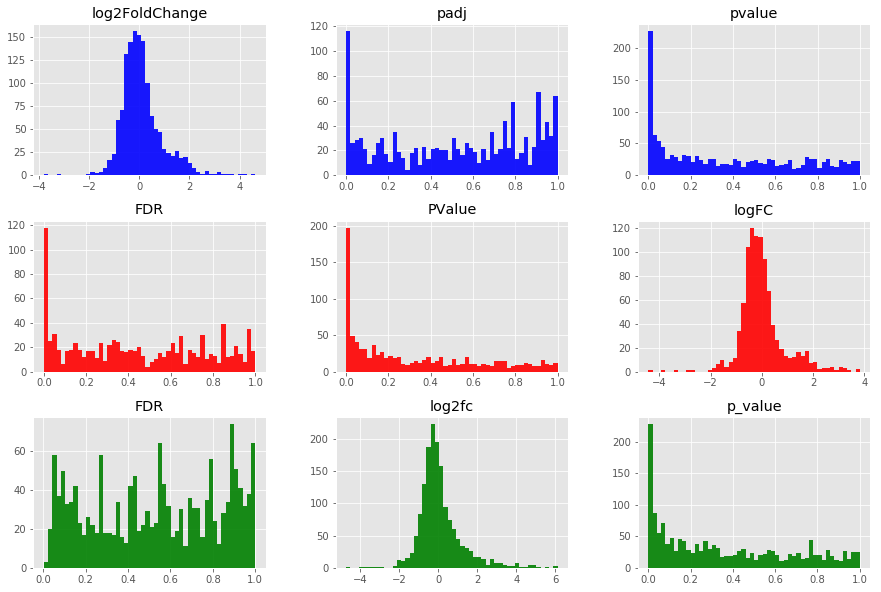

In [146]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
get_p_adj(testfilepath[0]).hist(ax=ax[0], alpha=0.9, color='blue',bins=50)
get_p_adj(testfilepath[1]).hist(ax=ax[1], alpha=0.9, color='red',bins=50)
get_p_adj(testfilepath[2]).hist(ax=ax[2], alpha=0.9, color='green',bins=50)

In [197]:
def get_significant_gene(filepath,thresfdr,thresfc):
    if filepath.split('.')[-2] =='DESeq2':
        testtable = pd.read_table(filepath)
        return testtable[(testtable['padj'] <=thresfdr)&(testtable['log2FoldChange'].abs() >=thresfc)]['Gene']
    elif filepath.split('.')[-2] =='mx_edgeR':
        testtable = pd.read_table(filepath)
        return testtable[(testtable['FDR'] <=thresfdr)&(testtable['logFC'].abs() >=thresfc)]['genes']
    elif filepath.split('.')[-2] =='wilcox':
        testtable = pd.read_table(filepath)
        #testtable.rename(columns={'Transcript.RepeatID..cmd.analyzeRepeats.pl..BioII.lulab_b.shared.genomes.human_hg38.anno.gtf.miRNA.gencode27.gtf.hg38..dfile.miRNA.tag.list..gid..rpkm.'
            #:'geneID'}, inplace=True)
        return testtable[(testtable['FDR'] <=thresfdr)&(testtable['log2fc'].abs() >=thresfc)].iloc[:,0]
    else:
        print 'no such file'

In [148]:
retained_genes={}
thresfdr = [0.05,0.05,0.05]
thresfc = [1,1,1]
for i in range(3):
    retained_genes[i] = get_significant_gene(testfilepath[i],thresfdr[i],thresfc[i])
    print retained_genes[i].shape[0]

109
119
26


### check retained genes's overlap

In [149]:
def get_venn_part(A,B,C):
    intersecab = np.intersect1d(A,B)
    intersecbc = np.intersect1d(B,C)
    intersecca = np.intersect1d(A,C)
    intersec0 = np.intersect1d(intersecab,intersecbc)
    intersec1 = np.setdiff1d(intersecab,intersec0)
    intersec2 = np.setdiff1d(intersecbc,intersec0)
    intersec3 = np.setdiff1d(intersecca,intersec0)
    middle = np.concatenate((intersec0,intersec1,intersec3,intersec2))
    intersec4 = np.setdiff1d(A,middle)
    intersec5 = np.setdiff1d(B,middle)
    intersec6 = np.setdiff1d(C,middle)
    return (intersec0,intersec1,intersec2,intersec3,intersec4,intersec5,intersec6), \
(intersec0.shape[0],intersec1.shape[0],intersec2.shape[0],intersec3.shape[0],intersec4.shape[0],intersec5.shape[0],intersec6.shape[0])
get_venn_part(retained_genes[0],retained_genes[1],retained_genes[2])[1]

(0, 90, 0, 0, 19, 29, 26)

In [2]:
top201 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000283364.1', 'lncRNA_ENSG00000264066.6',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000207778.3',
       'lncRNA_ENSG00000267391.4', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000283450.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1'])
top202 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000283450.1', 'miRNA_ENSG00000274705.2',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000283824.1',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000199072.3'])

In [5]:
set(top201)

{'Y_RNA_ENSG00000201778.1',
 'lncRNA_ENSG00000234741.7',
 'lncRNA_ENSG00000264066.6',
 'lncRNA_ENSG00000267391.4',
 'miRNA_ENSG00000199075.1',
 'miRNA_ENSG00000199085.3',
 'miRNA_ENSG00000199150.3',
 'miRNA_ENSG00000199153.1',
 'miRNA_ENSG00000199161.1',
 'miRNA_ENSG00000199179.3',
 'miRNA_ENSG00000207778.3',
 'miRNA_ENSG00000207789.1',
 'miRNA_ENSG00000208012.1',
 'miRNA_ENSG00000274705.2',
 'miRNA_ENSG00000283364.1',
 'miRNA_ENSG00000283450.1',
 'miRNA_ENSG00000284190.1',
 'miRNA_ENSG00000284440.1',
 'miRNA_ENSG00000284520.1',
 'miRNA_ENSG00000284565.1'}

In [13]:
plt.figure(1,figsize=(10,10))
set1 = set([0,1])#set(top201)
set2 = set([0,2])#set(top202)
v = venn3([set1, set2], ('A', 'B'))
c = venn3_circles(subsets=[set1, set2])
v.get_label_by_id('A').set_text('top20_trim')
v.get_label_by_id('B').set_text('top20_notrim')
c[0].set_lw(3.0)
c[0].set_ls('dotted')
c[1].set_lw(2.0)
c[1].set_ls('dashed')


TypeError: bad operand type for abs(): 'set'

109
119
26


Text(-150,-130,u'overlap genes')

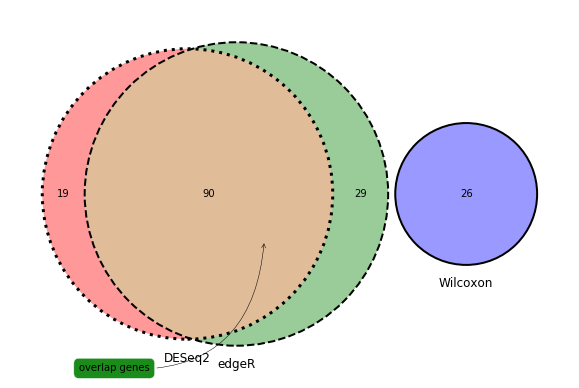

In [150]:
retained_genes={}
thresfdr = [0.05,0.05,0.05]
thresfc = [1,1,1]
for i in range(3):
    retained_genes[i] = get_significant_gene(testfilepath[i],thresfdr[i],thresfc[i])
    print retained_genes[i].shape[0]
plt.figure(figsize=(10,10))
set1 = set(retained_genes[0])
set2 = set(retained_genes[1])
set3 = set(retained_genes[2])
v = venn3([set1, set2, set3], ('A', 'B', 'C'))
c = venn3_circles(subsets=[set1, set2, set3])
v.get_label_by_id('A').set_text('DESeq2')
v.get_label_by_id('B').set_text('edgeR')
v.get_label_by_id('C').set_text('Wilcoxon')
c[0].set_lw(3.0)
c[0].set_ls('dotted')
c[1].set_lw(2.0)
c[1].set_ls('dashed')
plt.annotate('overlap genes', xy=np.array([0.08, -0.15]), xytext=(-150,-130),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.9),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))

In [292]:
afterind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='After')[0]+1
beforeind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='Before')[0]+1
normalind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='normal')[0]+1

# 61 samples result

In [198]:
rnanames = ['miRNA','lncRNA','piRNA','snRNA','srpRNA','snoRNA','tRNA','Y_RNA','mRNA']
#compare_method = ['AftervsBefore','AftervsNormal','BeforevsNormal']
compare_method = ['AftervsBefore','NormalvsAfter','NormalvsBefore']
def get_testpath(rnaname,compare_method):
    return ['05.diffexp/hcc_lulab.sequentialMap.homer.'+rnaname+'.'+compare_method+'.DESeq2.tsv',
                '05.diffexp/'+rnaname+'.mx_edgeR.'+compare_method,
            '05.diffexp/hcc_lulab.sequentialMap.homer.'+rnaname+'.'+compare_method+'.wilcox.tsv']


### specify rna type and compare method
'miRNA','lncRNA','piRNA','snRNA','srpRNA','snoRNA','tRNA','Y_RNA','mRNA'<br>
'AftervsBefore','AftervsNormal','BeforevsNormal'

In [162]:
testfilepath = get_testpath(rnanames[0],compare_method[0])

## plot three methods' test value hist

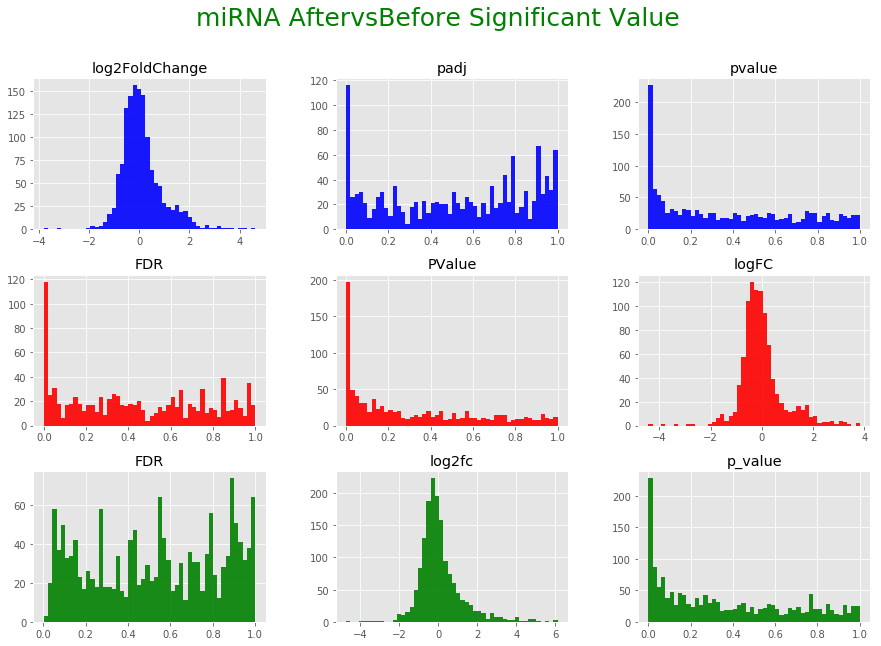

In [199]:
def plot_test_value(i,j):
    testfilepath = get_testpath(rnanames[i],compare_method[j])
    fig, ax = plt.subplots(3,3,figsize=(15,10))
    get_p_adj(testfilepath[0]).hist(ax=ax[0], alpha=0.9, color='blue',bins=50)
    get_p_adj(testfilepath[1]).hist(ax=ax[1], alpha=0.9, color='red',bins=50)
    get_p_adj(testfilepath[2]).hist(ax=ax[2], alpha=0.9, color='green',bins=50)
    fig.suptitle(rnanames[i]+' '+compare_method[j]+' Significant Value', fontsize=25,color = 'green')
plot_test_value(0,0)

In [200]:
def plot_venn(axes,testfile):
    retained_genes={}
    thresfdr = [0.05,0.05,0.05]
    thresfc = [1,1,1]
    for i in range(3):
        retained_genes[i] = get_significant_gene(testfile[i],thresfdr[i],thresfc[i])
        #print retained_genes[i].shape[0]
    set1 = set(retained_genes[0])
    set2 = set(retained_genes[1])
    set3 = set(retained_genes[2])
    v = venn3([set1, set2, set3], ('A', 'B', 'C'),ax=axes)
    c = venn3_circles(subsets=[set1, set2, set3],ax=axes)
    v.get_label_by_id('A').set_text('DESeq2')
    v.get_label_by_id('B').set_text('edgeR')
    v.get_label_by_id('C').set_text('Wilcoxon')
    c[0].set_lw(3.0)
    c[0].set_ls('dotted')
    c[1].set_lw(2.0)
    c[1].set_ls('dashed')
    #plt.annotate('overlap genes', xy=np.array([0.08, -0.15]), xytext=(-150,-130),
        #         ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.9),
         #        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))

tttest = pd.read_table('05.diffexp/hcc_lulab.sequentialMap.homer.lncRNA.AftervsBefore.wilcox.tsv')
tttest[tttest['p_value'] <=0.1].iloc[:,0]

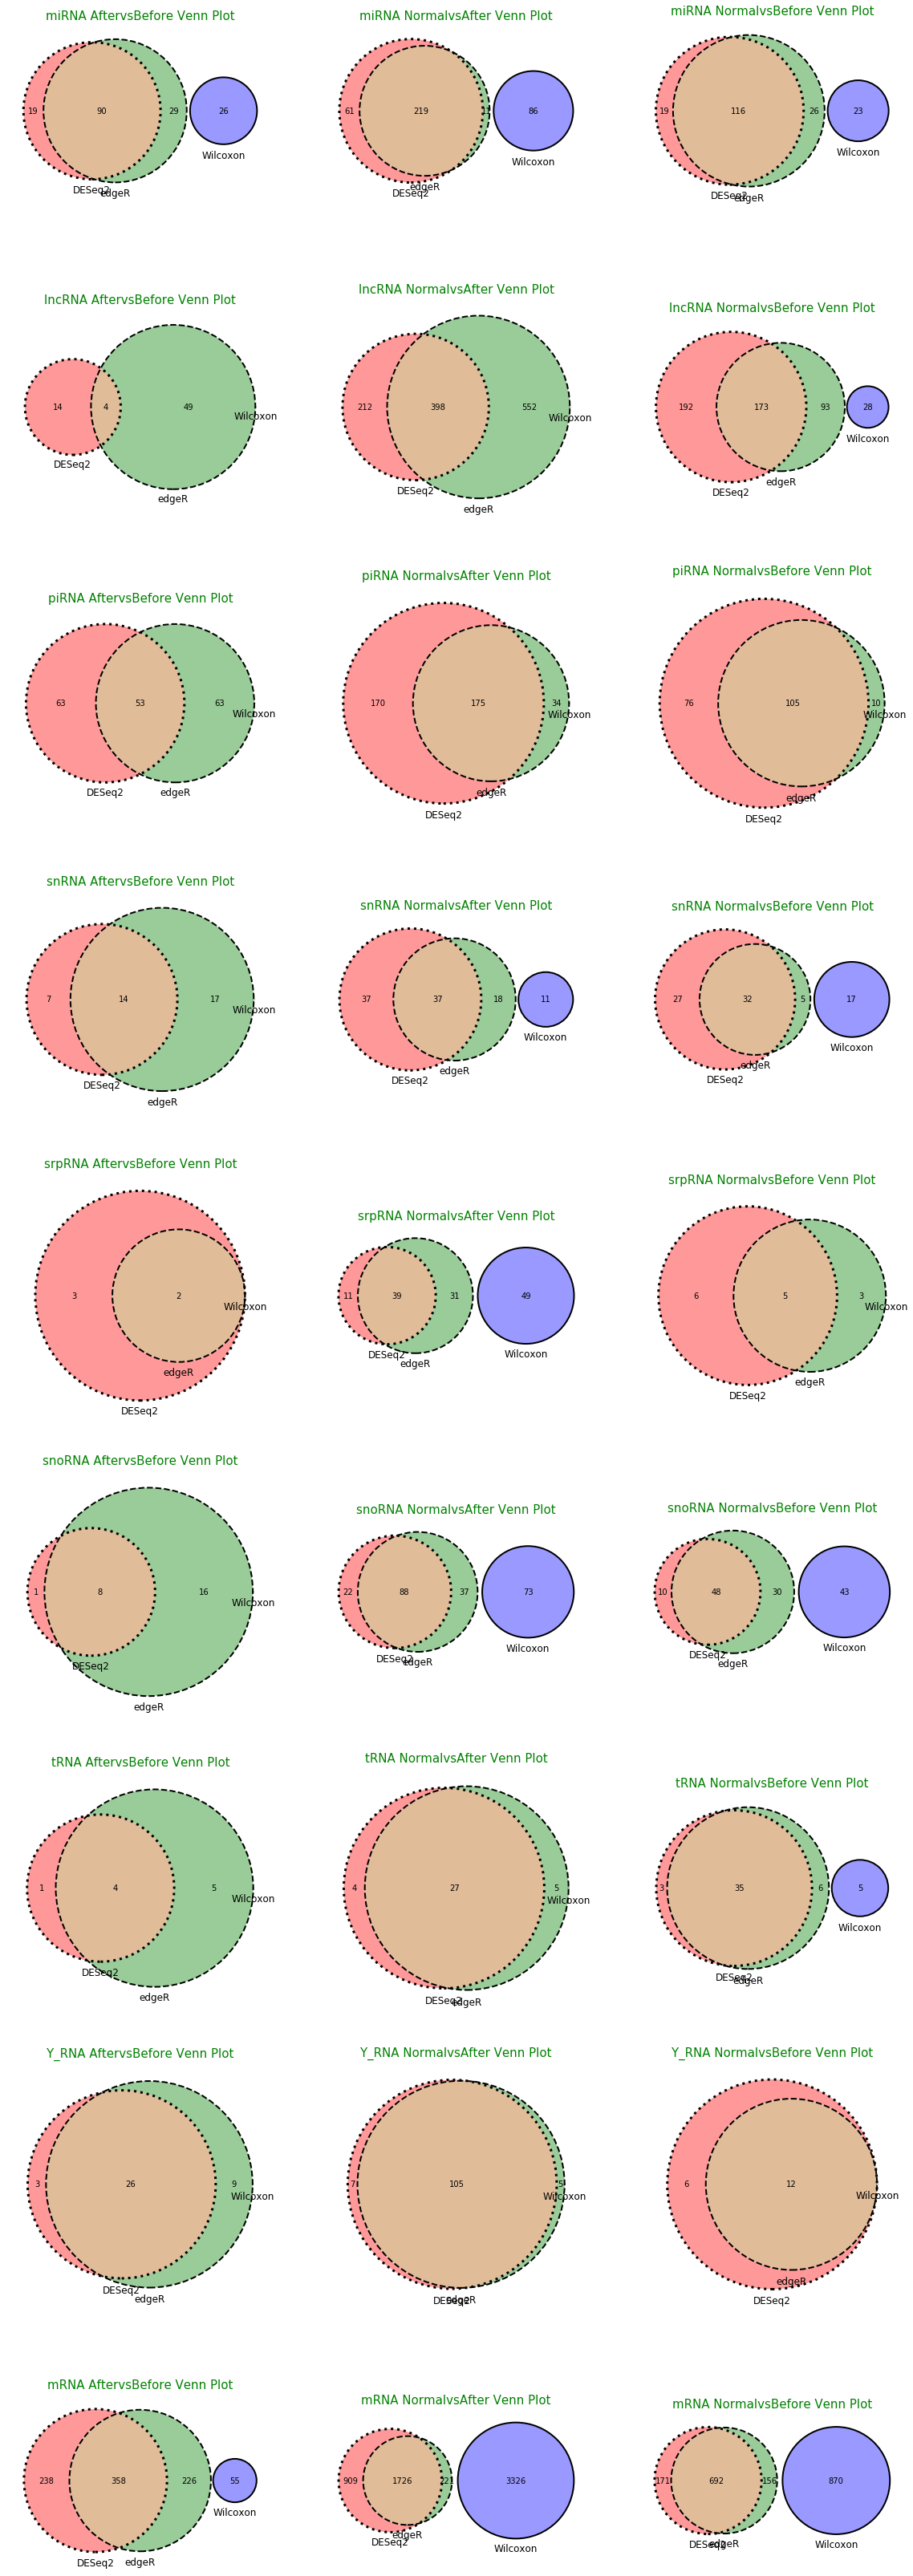

In [206]:
fig,ax= plt.subplots(9,3,figsize=(20,60))
for i in range(9):
    for j in range(3):
        plot_venn(ax[i,j],get_testpath(rnanames[i],compare_method[j]))
        ax[i,j].set_title(rnanames[i]+' '+compare_method[j]+' Venn Plot', fontsize=15,color = 'green')

# differentially expressed genes

In [207]:
rpkm_mx = {}
for i in range(9):
    rpkm_mx[rnanames[i]] = pd.read_table('04.counts/'+rnanames[i]+'.homer.rpkm.mx')

In [227]:
picked_rna = {}
for i in range(9):
    inter = {}
    for j in range(3):
        inter[j] = np.intersect1d(get_significant_gene(get_testpath(rnanames[i],compare_method[j])[0],0.05,1),
                  get_significant_gene(get_testpath(rnanames[i],compare_method[j])[1],0.05,1))
    picked_rna[rnanames[i]] = np.intersect1d(np.intersect1d(inter[0],inter[1]),inter[2])

In [360]:
picked_rna[rnanames[0]]

array(['miRNA_ENSG00000199127.1', 'miRNA_ENSG00000199130.3',
       'miRNA_ENSG00000207622.1', 'miRNA_ENSG00000207726.3',
       'miRNA_ENSG00000207778.3', 'miRNA_ENSG00000216135.3',
       'miRNA_ENSG00000263744.1', 'miRNA_ENSG00000264834.1',
       'miRNA_ENSG00000266006.1', 'miRNA_ENSG00000266204.1',
       'miRNA_ENSG00000275110.1', 'miRNA_ENSG00000284010.1',
       'miRNA_ENSG00000284440.1'], dtype=object)

### get specific genes' test value

In [362]:
[get_testpath(rnanames[i],compare_method[j])[0] for j in range(3)] 

['05.diffexp/hcc_lulab.sequentialMap.homer.snRNA.AftervsBefore.DESeq2.tsv',
 '05.diffexp/hcc_lulab.sequentialMap.homer.snRNA.NormalvsAfter.DESeq2.tsv',
 '05.diffexp/hcc_lulab.sequentialMap.homer.snRNA.NormalvsBefore.DESeq2.tsv']

In [393]:
def get_interest_gene_value(rnaind,genename):
    value = []
    testtable ={}
    for t in range(3):
        testtable[t] = pd.read_table([get_testpath(rnanames[rnaind],compare_method[j])[0] for j in range(3)][t])
    genename = rnanames[rnaind]+'_'+genename
    indforpiced = np.where(np.isin(np.array(testtable[0].iloc[:,0]).astype('S'),genename)==1)[0]
    for t in range(3):
        value.append(np.array(testtable[t]['padj'].iloc[indforpiced,]))
        value.append(np.array(testtable[t]['log2FoldChange'].iloc[indforpiced,]))
    return value

In [290]:
def get_picked_table(ind):
    indforpiced = np.where(np.isin(np.array(rpkm_mx[rnanames[ind]].iloc[:,0]).astype('S'),np.array([i.split('_')[-1] for i in picked_rna[rnanames[ind]]]).astype('S'))==1)[0]
    return rpkm_mx[rnanames[ind]].iloc[indforpiced,]
def get_conditions_rpkm(ind):
    return np.array(get_picked_table(ind).iloc[1:,normalind]),np.array(get_picked_table(ind).iloc[:,beforeind]),np.array(get_picked_table(ind).iloc[:,afterind]),np.array(get_picked_table(ind).iloc[:,0])
                                        

##### miRNA three conditions some genes

In [442]:
def get_text(rnaind,geneind):
    result = np.round(get_interest_gene_value(rnaind,get_conditions_rpkm(rnaind)[3][geneind]),4)
    return ('AvsB: '+ 'adjp '+str(result[0][0])+" log2fc "+str(result[1][0]),
            'NvsA: '+ 'adjp '+ str(result[2][0])+" log2fc "+str(result[3][0]),
            'NvsB: '+ 'adjp '+ str(result[4][0])+" log2fc "+str(result[5][0]))

In [441]:
get_text(0,0)

('AvsB: adjp 0.0031 log2fc 1.96427',
 'NvsA: adjp 0.0 log2fc -3.82843',
 'NvsB: adjp 0.02685 log2fc -1.86417')

In [499]:
def plot_scatter(axes,rnaind,geneind):
    data1 = get_conditions_rpkm(rnaind)[0][geneind]
    data2 = get_conditions_rpkm(rnaind)[1][geneind]
    data3 = get_conditions_rpkm(rnaind)[2][geneind]
    axes.scatter([np.random.normal(1,0.1) for i in range(data1.shape[0])],data1)
    axes.scatter([np.random.normal(2,0.1) for i in range(data2.shape[0])],data2)
    axes.scatter([np.random.normal(3,0.1) for i in range(data3.shape[0])],data3)
    axes.set_title(rnanames[rnaind]+'  '+get_conditions_rpkm(rnaind)[3][geneind])
    axes.set_xticks(np.arange(1,4))
    axes.set_xticklabels(['Normal','Before','After'])
    axes.text(0.8,axes.get_yticks()[-3],get_text(rnaind,geneind)[0]+'\n'+get_text(rnaind,geneind)[1]+'\n'+get_text(rnaind,geneind)[2]+'\n')

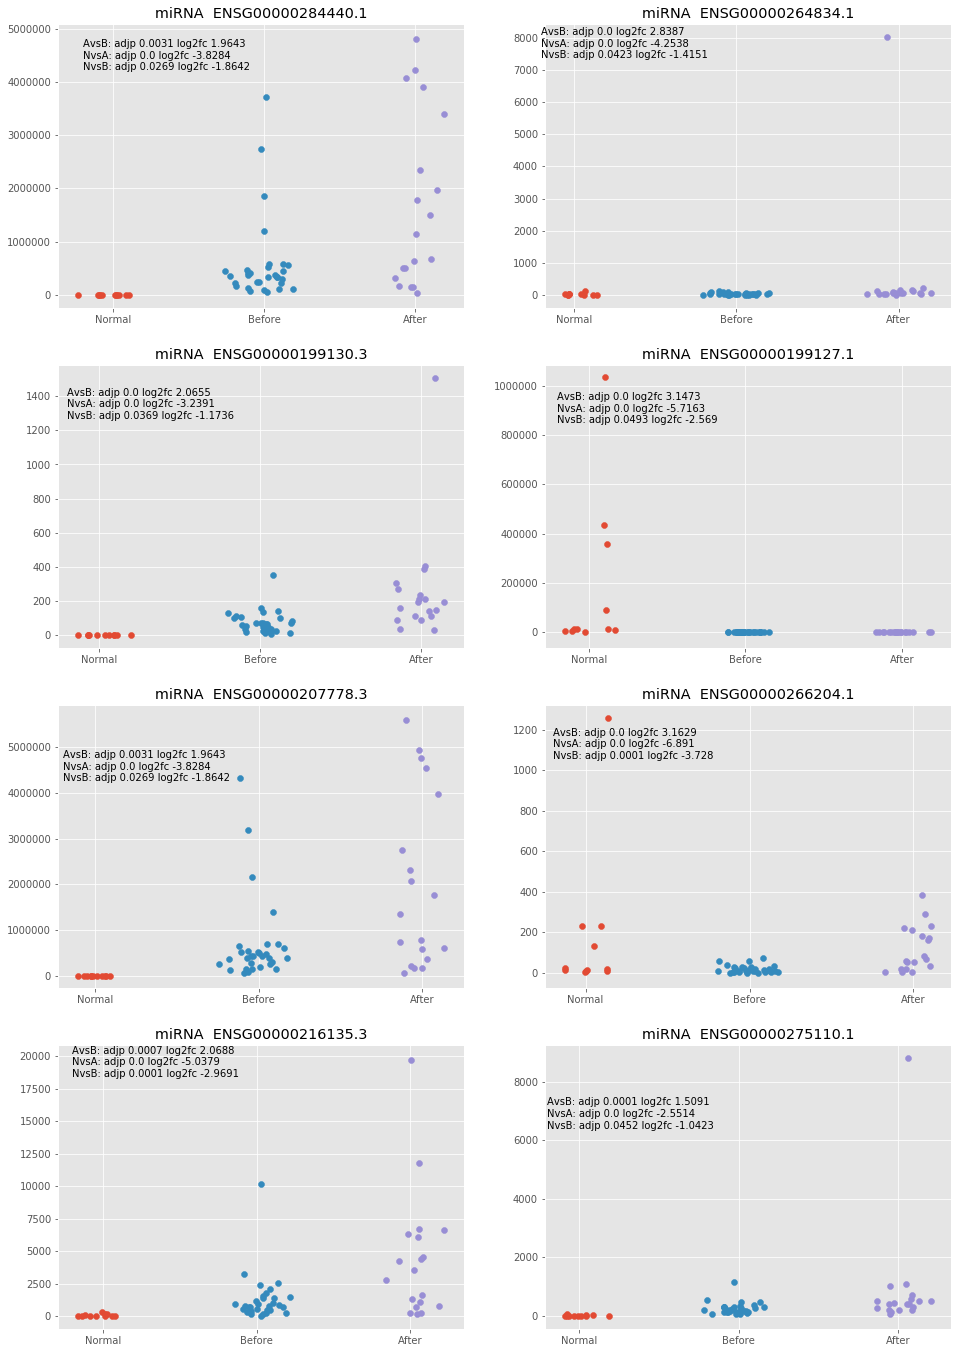

In [501]:
fig,ax= plt.subplots(4,2,figsize=(16,24))
for i in range(4):
    for j in range(2):
        plot_scatter(ax[i,j],0,i*2+j)

In [502]:
for i in range(9):
    print get_conditions_rpkm(i)[0].shape

(12, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(1, 11)
(0, 11)
(0, 11)
(73, 11)


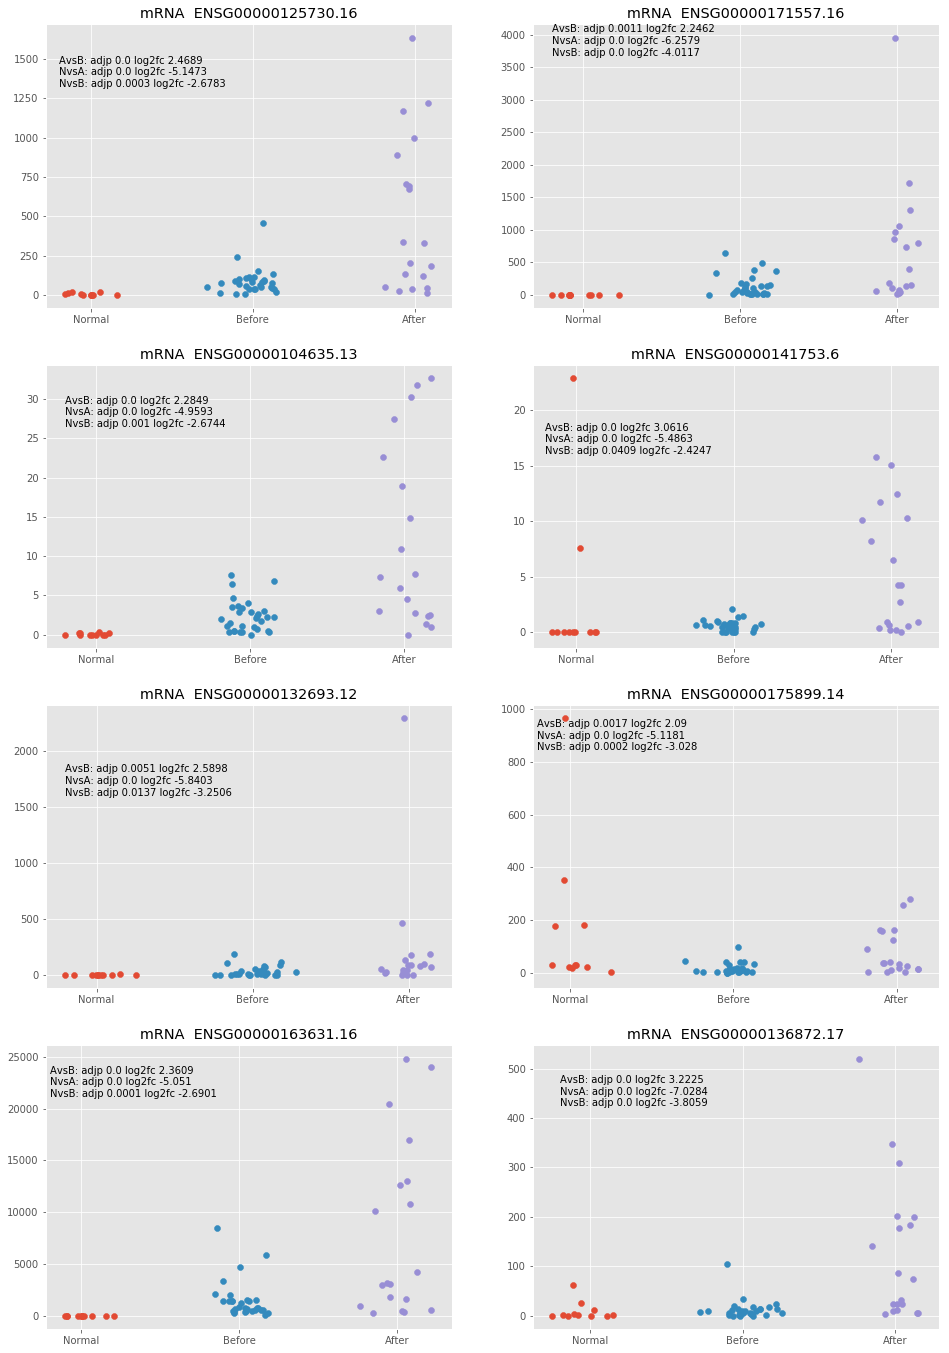

In [503]:
fig,ax= plt.subplots(4,2,figsize=(16,24))
for i in range(4):
    for j in range(2):
        plot_scatter(ax[i,j],8,i*2+j)

In [507]:
afterind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='After')[0]+1
beforeind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='Before')[0]+1
normalind = np.where(pd.read_table('05.diffexp/design.tsv')['Treatment'] =='normal')[0]+1

In [547]:
table = pd.concat([pd.DataFrame(np.average(np.array(rpkm_mx[rnanames[0]].iloc[:,afterind]),axis=1)),
         pd.DataFrame(np.average(np.array(rpkm_mx[rnanames[0]].iloc[:,beforeind]),axis=1)),
         pd.DataFrame(np.average(np.array(rpkm_mx[rnanames[0]].iloc[:,normalind]),axis=1))],axis=1)

(array([1868.,    5.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.]), array([      0.        ,  278030.49220645,  556060.9844129 ,
         834091.47661935, 1112121.96882581, 1390152.46103226,
        1668182.95323871, 1946213.44544516, 2224243.93765161,
        2502274.42985806, 2780304.92206452]), <a list of 10 Patch objects>)

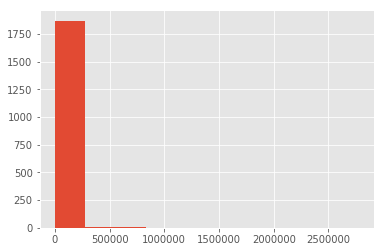

In [534]:
hist(np.clip(np.average(np.array(rpkm_mx[rnanames[0]].iloc[:,beforeind]),axis=1)),)

In [532]:
np.average(np.array(rpkm_mx[rnanames[0]].iloc[:,normalind]),axis=1)

array([0.        , 0.47045455, 3.35490909, ..., 0.27018182, 0.        ,
       7.806     ])

fig,ax= plt.subplots(3,1,figsize=(16,24))
table.iloc[:,0].hist(ax=ax[0], alpha=0.9, color='blue',bins=50)
table.iloc[:,1].hist(ax=ax[1], alpha=0.9, color='blue',bins=50)
table.iloc[:,2].hist(ax=ax[2], alpha=0.9, color='blue',bins=50)